# Primer parcial Dafne Yudcovsky 17/4

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
import cmath
from ipywidgets import interactive, fixed

# Ejercicio 1

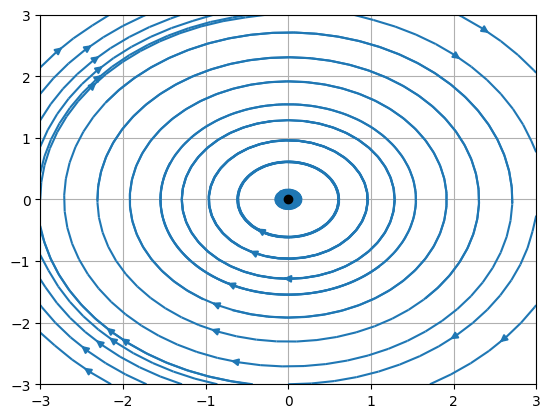

In [141]:
#Planteamos el sistema lineal:
a = 0
def ejercicio_1a(X, t, a):
  x,y = X
  dxdt = y + a*x*(x**2 + y**2)
  dydt = -x + a*y*(x**2 + y**2)
  return([dxdt, dydt])

Nt = 1000
tmax = 6
t = np.linspace(0, tmax, Nt)

inicio = -3
final = 3
Y, X = np.mgrid[inicio:final:100j,inicio:final:100j]

U, V = ejercicio_1a([X, Y], t, a)

plt.streamplot(X, Y, U, V, density=[0.5, 0.5], broken_streamlines= False)
plt.plot([0],[0], marker = 'o', markersize=6, linestyle='', color='k')
plt.grid()
plt.show()

In [142]:
def ejercicio_1b(X, t, a):
  x,y = X
  dxdt = y + a*x*(x**2 + y**2)
  dydt = -x + a*y*(x**2 + y**2)
  return([dxdt, dydt])

Nt = 1000
tmax = 6
t = np.linspace(0, tmax, Nt)

def diagrama_de_fase(a=1):
    inicio = -3
    final = 3
    Y, X = np.mgrid[inicio:final:100j,inicio:final:100j]

    U, V = ejercicio_1b([X, Y], t, a)

    plt.streamplot(X, Y, U, V, density=[0.3, 0.3], broken_streamlines= False)
    plt.plot([0],[0], marker = 'o', markersize=6, linestyle='', color='k')
    plt.grid()
    plt.show()

p=interactive(diagrama_de_fase, a = (-5. , 5.))
display(p)

interactive(children=(FloatSlider(value=1.0, description='a', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

# Ejercicio 2

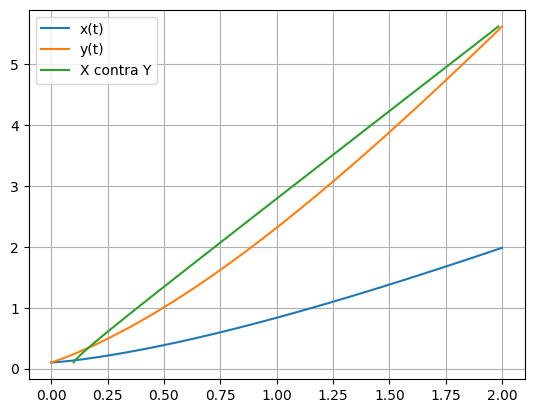

In [143]:
def ejercicio_2a(X, t):
    x1, x2, y1, y2= X
    dx1 = x2
    dx2 = x1/((np.sqrt(x1**2+x2**2))**3)
    dy1 = y2
    dy2 = y1/((np.sqrt(x1**2+x2**2))**3)
    return([dx1, dx2, dy1, dy2])

condicion_inicial = [0.1,0.002,0.1,0.99]
Nt = 1000
tmax = 2
t = np.linspace(0, tmax, Nt)

solucion_2a = odeint(ejercicio_2a, condicion_inicial, t, rtol=1e-10, atol = 1e-10)
x, dxdt, y, dydt = solucion_2a.T

plt.plot(t, x, label = 'x(t)')
plt.plot(t, y, label = 'y(t)')
plt.plot(x,y, label = 'X contra Y')
plt.legend()
plt.grid()
plt.show()

Supongamos que nuestro Sol se encuentra en el (0,0). Decidí que tanto la posición de x como la de y comiencen en 1/10 exactamente donde está el sol. Decidí que la velocidad de x sea muy chica y la de y muy grande (para valores entre 0 y 1), que lo usé para mostrar que por más de que alguna coordenada vaya rápido o lento, la partícula igual se sigue alejando del sol.

# 2b: Caso repulsivo

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


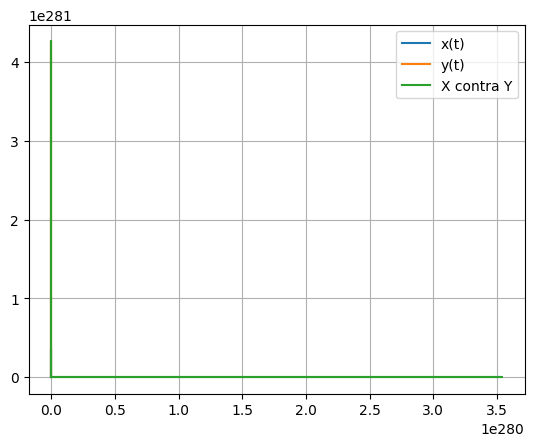

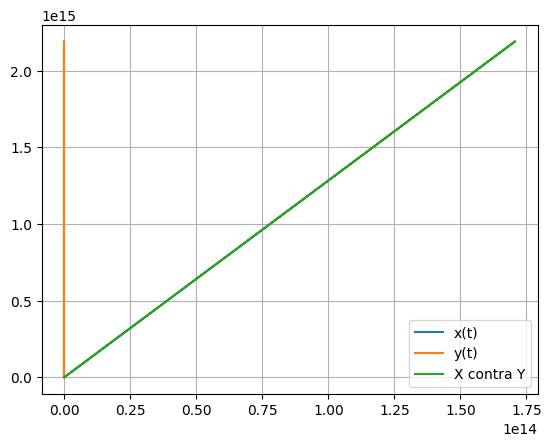

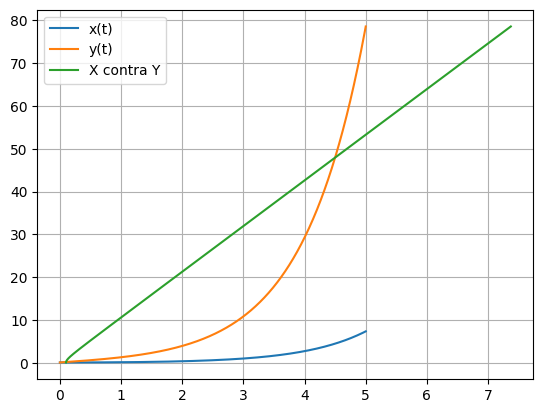

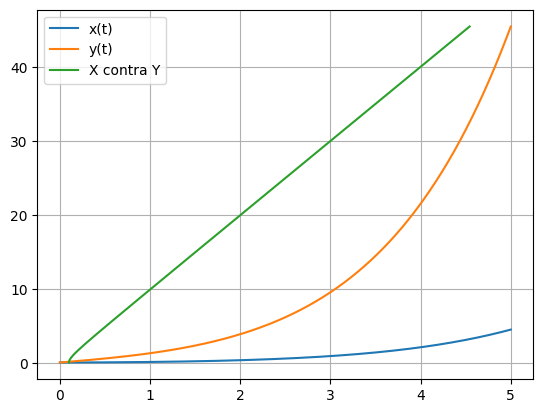

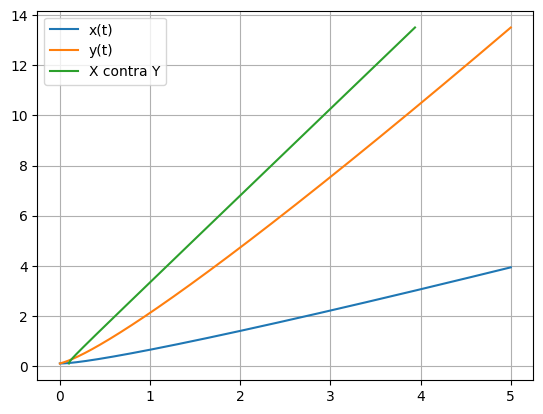

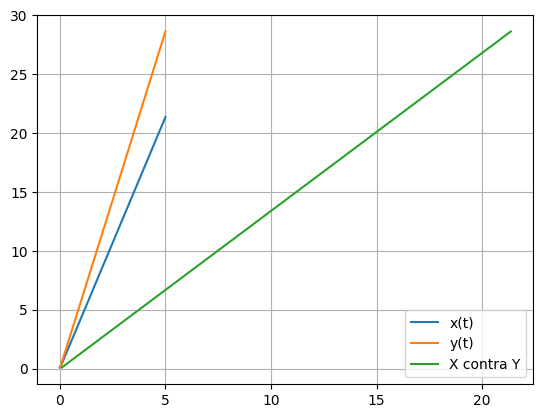

In [144]:
def ejercicio_2b_repulsivo(X, t, r):
    x1, x2, y1, y2= X
    dx1 = x2
    dx2 = x1/((x1**2 + y1**2)**(r))
    dy1 = y2
    dy2 = y1/((x1**2 + y1**2)**(r))
    return([dx1, dx2, dy1, dy2])

condicion_inicial = [0.1,0.002,0.1,0.99]
Nt = 1000
tmax = 5
t = np.linspace(0, tmax, Nt)

r= [-1, -0.5, 0.004, 0.1, 1, 2]
for i in range(len(r)):
  solucion_2b_repulsiva = odeint(ejercicio_2b_repulsivo, condicion_inicial, t, args=(r[i],) ,rtol=1e-10, atol = 1e-10)
  x, dxdt, y, dydt = solucion_2b_repulsiva.T

  plt.plot(t, x, label = 'x(t)')
  plt.plot(t, y, label = 'y(t)')
  plt.plot(x,y, label = 'X contra Y')
  plt.legend()
  plt.grid()
  plt.show()

Sigue alejándose del sol linealmente (bien). Con valores de r < 0 explota. En general explota o se va muy rápido a infinito para condiciones iniciales de números altos y r positivos.

# 2b: Caso atractivo

In [145]:
def ejercicio_2b_atractivo(X, t, r):
    x1, x2, y1, y2= X
    dx1 = x2
    dx2 = -x1/((x1**2 + y1**2)**(r))
    dy1 = y2
    dy2 = -y1/((x1**2 + y1**2)**(r))
    return([dx1, dx2, dy1, dy2])

condicion_inicial = [0.2,0.2,0.2,0.9]
Nt = 1000
tmax = 10
t = np.linspace(0, tmax, Nt)

def generar_solucion(r=1):
  solucion_2b_atractivo = odeint(ejercicio_2b_atractivo, condicion_inicial, t, args=(r,) ,rtol=1e-10, atol = 1e-10)
  x, dxdt, y, dydt = solucion_2b_atractivo.T
  plt.plot(x,y, label = 'X contra Y')
  plt.legend()
  plt.grid()
  plt.show()

p=interactive(generar_solucion, r= (-2. , 2.))
display(p)

interactive(children=(FloatSlider(value=1.0, description='r', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

En el caso atractivo, para muchos valores de r y condiciones iniciales, en todos los casos tanto x como y realizar órbitas periódicas alrededor del 0 (donde está el sol), así que el modelo funciona como un atractor al origen. Y cuando r != 0, la órbita se asemeja a una flor. Mientras más chico sea r (en principio en módulo, aunque en los positivos la fuerza es más fuerte) menos fuerte es la fuerza de atracción y con r más grandes que 1, los períodos de las órbitas son más cortos, por lo que la fuerza es más grande con r grandes (y en principio positivos). Se observaron más giros al sol.

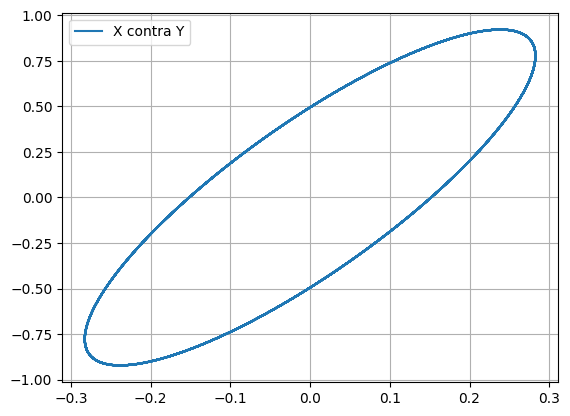

In [146]:
#Caso r=0
r = 0
def ejercicio_2b_atractivo(X, t, r):
    x1, x2, y1, y2= X
    dx1 = x2
    dx2 = -x1/((x1**2 + y1**2)**(r))
    dy1 = y2
    dy2 = -y1/((x1**2 + y1**2)**(r))
    return([dx1, dx2, dy1, dy2])


condicion_inicial = [0.2,0.2,0.2,0.9]
Nt = 1000
tmax = 90
t = np.linspace(0, tmax, Nt)

solucion_2b_atractivo = odeint(ejercicio_2b_atractivo, condicion_inicial, t, args=(r,) ,rtol=1e-10, atol = 1e-10)
x, dxdt, y, dydt = solucion_2b_atractivo.T

plt.plot(x,y, label = 'X contra Y')
plt.legend()
plt.grid()
plt.show()

En el caso r = 0, podemos observar que la partícula ahora tiene una órbita fija, en cambio r --> 0

In [147]:
#Caso r-->0
r = 0.002
def ejercicio_2b_atractivo(X, t, r):
    x1, x2, y1, y2= X
    dx1 = x2
    dx2 = -x1/((x1**2 + y1**2)**(r))
    dy1 = y2
    dy2 = -y1/((x1**2 + y1**2)**(r))
    return([dx1, dx2, dy1, dy2])

condicion_inicial = [0.2,0.2,0.2,0.9]
Nt = 1000

def generar_solucion(tmax = 10):
  t = np.linspace(0, tmax, Nt)

  solucion_2b_atractivo = odeint(ejercicio_2b_atractivo, condicion_inicial, t, args=(r,) ,rtol=1e-10, atol = 1e-10)
  x, dxdt, y, dydt = solucion_2b_atractivo.T

  plt.plot(x,y, label = 'X contra Y')
  plt.legend()
  plt.grid()
  plt.show()

p=interactive(generar_solucion, tmax= (1, 3000))
display(p)

interactive(children=(IntSlider(value=10, description='tmax', max=3000, min=1), Output()), _dom_classes=('widg…

En un tiempo corto, parece realizar una órbita alrededor del sol pero realmente no lo hace, cada vez que está por terminar un período, no vuelve al mismo lugar después de 2kpi.

#Ejercicio 3

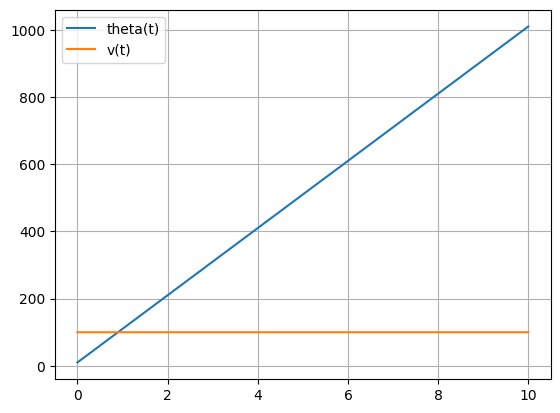

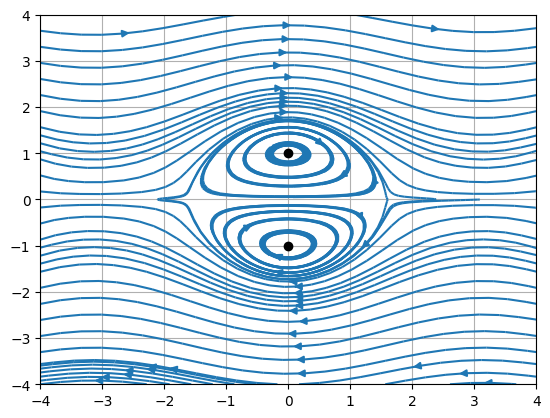

In [148]:
d = 0
def ejercicio_3a(X, t, d):
  theta, v = X
  dthdt = ((-1 * np.cos(theta))/v) + v
  dvdt = -1 * np.sin(theta) - d * v**2
  return([dthdt, dvdt])

Nt = 1000
tmax =10
t = np.linspace(0, tmax, Nt)
condicion_inicial_3 = [10, 100]

solucion_3a = odeint(ejercicio_3a, condicion_inicial_3, t, args=(d,) ,rtol=1e-10, atol = 1e-10)
theta, v = solucion_3a.T

plt.plot(t, theta, label = "theta(t)")
plt.plot(t, v, label = "v(t)")
plt.legend()
plt.grid()
plt.show()

inicio = -4
final = 4
v, theta = np.mgrid[inicio:final:100j,inicio:final:100j]

U, W = ejercicio_3a([theta, v], t, d)

plt.streamplot(theta, v, U, W, density=[0.8, 0.8], broken_streamlines= False)
plt.plot([0, 0],[1, -1], marker = 'o', markersize=6, linestyle='', color='k')
plt.grid()
plt.show()

**UN CICLO LÍMITE!!!**

La interpretación física que le puedo dar al primer gráfico es que la velocidad no varía, es cte para todo tiempo y el ángulo que tiene con la horizontal aumenta de forma lineal, por lo que se me ocurre que queda volando en el espacio y se queda girando sobre sí mismo sin parar mientras sigue a sus constantes 50 km/h (total cada tanto pega una vuelta completa pero los valores de los ángulos se repiten cada 2kpi).

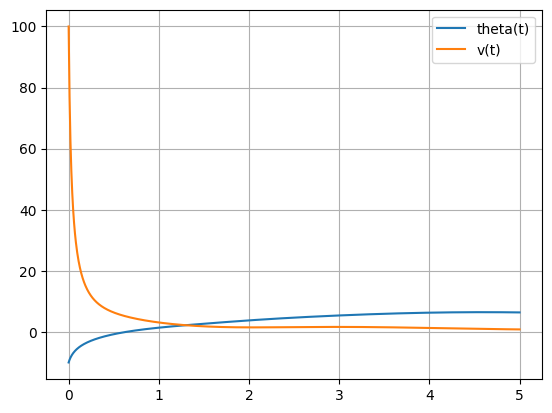

In [149]:
d = 0.3
def ejercicio_3b(X, t, d):
  theta, v = X
  dthdt = ((-1 * np.cos(theta))/v) + v
  dvdt = -1 * np.sin(theta) - d * v**2
  return([dthdt, dvdt])

Nt = 1000
tmax = 5
t = np.linspace(0, tmax, Nt)

condicion_inicial_3 = [-10, 100]

solucion_3b = integrate.odeint(ejercicio_3b, condicion_inicial_3, t, args=(d,) ,rtol=1e-10, atol = 1e-10)
theta, v = solucion_3b.T

plt.plot(t, theta, label = "theta(t)")
plt.plot(t, v, label = "v(t)")
plt.legend()
plt.grid()
plt.show()


Podemos analizar que el frenado va disminuyendo la velocidad asintóticamente a cero, mientras que el ángulo con la horizontal va aumentando. La diferencia con el anterior es que eventualmente su velocidad es despreciable, tendiendo a algún punto en el espacio (una velocidad pequeña entre 0 y 1), en un ángulo algo positivo debido a lo que genera el frenado.

Veámoslo en el diagrama de fases. En el mismo queda verificado que el punto de equilibrio es donde v es chiquita en módulo y queda un poco inclinado hacia arriba o hacia abajo.

In [150]:
def generar_solucion(d = 1):
  inicio = -4
  final = 4
  v, theta = np.mgrid[inicio:final:100j,inicio:final:100j]

  U, W = ejercicio_3a([theta, v], t, d)

  plt.streamplot(theta, v, U, W, density=[0.8, 0.8], broken_streamlines= False)
  plt.grid()
  plt.show()

p=interactive(generar_solucion, d= (-3. , 3.))
display(p)

interactive(children=(FloatSlider(value=1.0, description='d', max=3.0, min=-3.0), Output()), _dom_classes=('wi…

**Muchas gracias por su tiempo**